In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [4]:
df_summary = pd.read_csv('Measurement_summary.csv')
df_summary.head()

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.051,0.002,1.2,69.0,61.0


In [7]:
# Step 3: Preprocess the data
df_summary['Measurement date'] = pd.to_datetime(df_summary['Measurement date'])
df_summary['Weekday/Weekend'] = df_summary['Measurement date'].dt.dayofweek // 5  # 0 for weekdays, 1 for weekends
df_summary.head()

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5,Weekday/Weekend
0,2017-01-01 00:00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.059,0.002,1.2,73.0,57.0,1
1,2017-01-01 01:00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.058,0.002,1.2,71.0,59.0,1
2,2017-01-01 02:00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,59.0,1
3,2017-01-01 03:00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,58.0,1
4,2017-01-01 04:00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.051,0.002,1.2,69.0,61.0,1


In [8]:
# Step 4: Group the data
grouped_data = df_summary.groupby('Weekday/Weekend')

In [18]:
# Step 5: Perform statistical testing
pollutants = ['SO2', 'NO2', 'O3', 'CO', 'PM10']
for pollutant in pollutants:
    weekday_data = df_summary[df_summary['Weekday/Weekend'] == 0][pollutant]
    weekend_data = df_summary[df_summary['Weekday/Weekend'] == 1][pollutant]
    t_statistic, p_value = ttest_ind(weekday_data, weekend_data)
    
    # Step 6: Interpret the results
    if p_value < 0.05:
        print(f"There is some difference in {pollutant} levels between weekdays and weekends.")
    else:
        print(f"There is no significant difference in {pollutant} levels between weekdays and weekends.")

There is no significant difference in SO2 levels between weekdays and weekends.
There is some difference in NO2 levels between weekdays and weekends.
There is some difference in O3 levels between weekdays and weekends.
There is some difference in CO levels between weekdays and weekends.
There is some difference in PM10 levels between weekdays and weekends.


<Figure size 800x600 with 0 Axes>

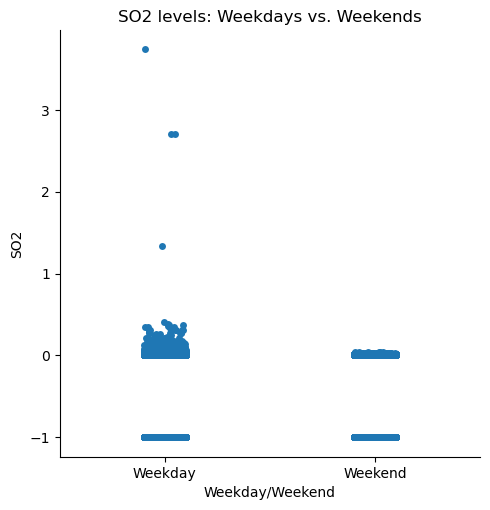

<Figure size 800x600 with 0 Axes>

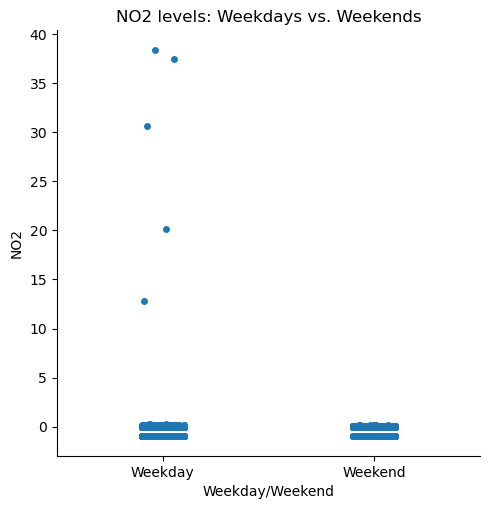

<Figure size 800x600 with 0 Axes>

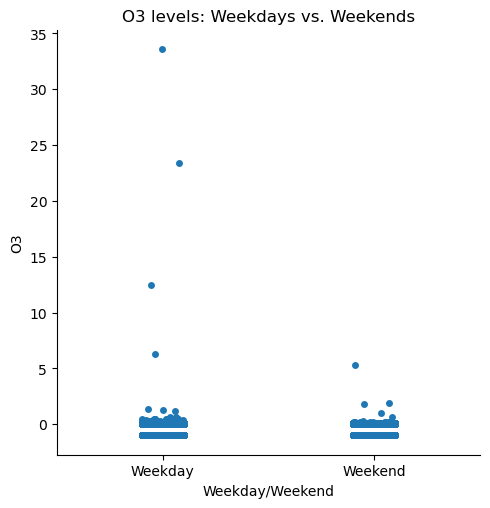

<Figure size 800x600 with 0 Axes>

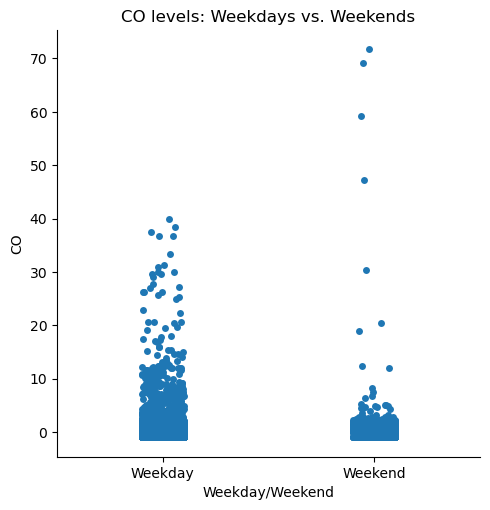

<Figure size 800x600 with 0 Axes>

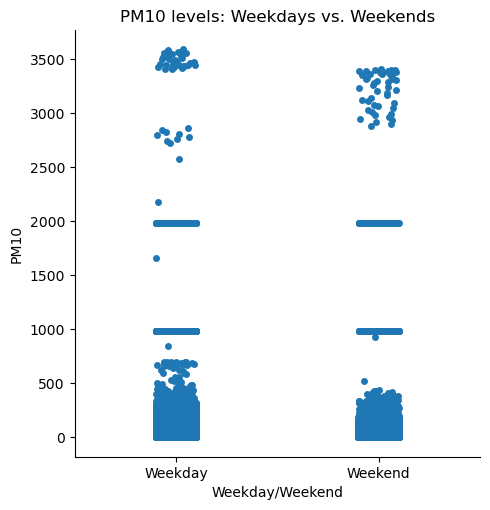

In [15]:
import seaborn as sns

for pollutant in pollutants:
    plt.figure(figsize=(8, 6))
    sns.catplot(data=df_summary, x='Weekday/Weekend', y=pollutant)
    plt.xlabel('Weekday/Weekend')
    plt.ylabel(pollutant)
    plt.title(f'{pollutant} levels: Weekdays vs. Weekends')
    plt.xticks([0, 1], ['Weekday', 'Weekend'])
    plt.show()

In [20]:
df_summary = pd.read_csv('Measurement_summary.csv')

# Step 3: Preprocess the data
df_summary['Measurement date'] = pd.to_datetime(df_summary['Measurement date'])
df_summary['Weekday/Weekend'] = df_summary['Measurement date'].dt.dayofweek // 5  # 0 for weekdays, 1 for weekends
df_summary['Year'] = df_summary['Measurement date'].dt.year

# Step 4: Group the data and calculate mean values
grouped_data = df_summary.groupby(['Year', 'Weekday/Weekend']).mean()

# Step 5: Print the mean values
pollutants = ['SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2.5']

for pollutant in pollutants:
    print(f"Mean {pollutant} levels:")
    print(grouped_data[pollutant])
    print()

Mean SO2 levels:
Year  Weekday/Weekend
2017  0                  0.003271
      1                  0.003042
2018  0                 -0.001244
      1                 -0.000728
2019  0                 -0.007573
      1                 -0.008212
Name: SO2, dtype: float64

Mean NO2 levels:
Year  Weekday/Weekend
2017  0                  0.028445
      1                  0.026448
2018  0                  0.023715
      1                  0.022984
2019  0                  0.016559
      1                  0.014159
Name: NO2, dtype: float64

Mean O3 levels:
Year  Weekday/Weekend
2017  0                  0.022856
      1                  0.023719
2018  0                  0.017085
      1                  0.020638
2019  0                  0.011992
      1                  0.013810
Name: O3, dtype: float64

Mean CO levels:
Year  Weekday/Weekend
2017  0                  0.512895
      1                  0.530170
2018  0                  0.494409
      1                  0.494958
2019  0           

/var/folders/9x/d3dvqy2x2fd3gntsc3m2t23c0000gn/T/ipykernel_95733/342623516.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = df_summary.groupby(['Year', 'Weekday/Weekend']).mean()
